In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("sample_submission.csv")

In [3]:
df

,Id,SalePrice
0,1461,169277.0525
1,1462,187758.3940
2,1463,183583.6836
3,1464,179317.4775
4,1465,150730.0800
...,...,...
1454,2915,167081.2209
1455,2916,164788.7782
1456,2917,219222.4234
1457,2918,184924.2797


In [4]:
df.head()

,Id,SalePrice
0,1461,169277.0525
1,1462,187758.3940
2,1463,183583.6836
3,1464,179317.4775
4,1465,150730.0800


In [5]:
df.tail()

,Id,SalePrice
1454,2915,167081.2209
1455,2916,164788.7782
1456,2917,219222.4234
1457,2918,184924.2797
1458,2919,187741.8667


In [6]:
df.drop(105,axis=0,inplace=True)

In [7]:
df.tail()

,Id,SalePrice
1454,2915,167081.2209
1455,2916,164788.7782
1456,2917,219222.4234
1457,2918,184924.2797
1458,2919,187741.8667


In [8]:
df['Id']=pd.to_datetime(df['Id'])

In [9]:
df.head()

,Id,SalePrice
0,1970-01-01 00:00:00.000001461,169277.0525
1,1970-01-01 00:00:00.000001462,187758.3940
2,1970-01-01 00:00:00.000001463,183583.6836
3,1970-01-01 00:00:00.000001464,179317.4775
4,1970-01-01 00:00:00.000001465,150730.0800


In [10]:
df.set_index('Id' ,inplace=True)

In [11]:
df.head()

,SalePrice
Id,
1970-01-01 00:00:00.000001461,169277.0525
1970-01-01 00:00:00.000001462,187758.3940
1970-01-01 00:00:00.000001463,183583.6836
1970-01-01 00:00:00.000001464,179317.4775
1970-01-01 00:00:00.000001465,150730.0800


In [12]:
df.describe()

,SalePrice
count,1458.000000
mean,179189.941760
std,16522.367692
min,135751.318900
25%,168696.541750
50%,179221.296050
75%,186804.010100
max,281643.976100


C:\Users\Shubham\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 719163.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


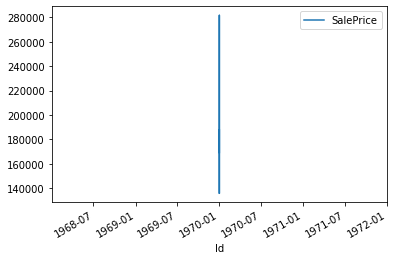

In [13]:
df.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
test_result=adfuller(df['SalePrice'])

In [16]:
print("The value given as output by adfuller is : \n 'ADF test Statistic','p-value','#Lags used','Number of Observations Used'")

The value given as output by adfuller is : 
 'ADF test Statistic','p-value','#Lags used','Number of Observations Used'


In [17]:
def adfuller_test(SalePrice):
    result=adfuller(SalePrice)
    labels = ['ADF Test Statistic','p-value','#Lags used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationatry")
        else:
            print("weak evidence against null hypothesis, time series is non-stationary")

In [18]:
adfuller_test(df['SalePrice'])

ADF Test Statistic : -22.67692142129115
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationatry
p-value : 0.0
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationatry
#Lags used : 1
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationatry
Number of Observations Used : 1456
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationatry


# Auto Regressive Model

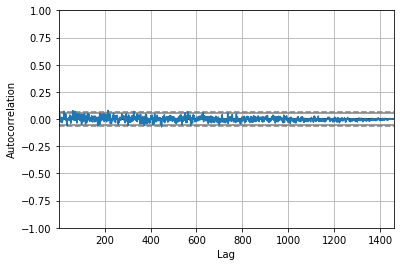

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['SalePrice'])
plt.show()

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
model=ARIMA(df['SalePrice'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.SalePrice   No. Observations:                 1457
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16188.327
Method:                       css-mle   S.D. of innovations          16145.835
Date:                Fri, 16 Oct 2020   AIC                          32384.655
Time:                        02:12:48   BIC                          32405.791
Sample:                             1   HQIC                         32392.540
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9395      1.215      4.067      0.000       2.559       7.320
ar.L1.D.SalePrice     0.1732      0.026      6.710      0.000       0.123       0.224
ma.L1.D.SalePrice    -1.0000      0.002   -448.138      0.000      -1.004      -0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.7743           +0.0000j            5.7743            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\Shubham\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 719163.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


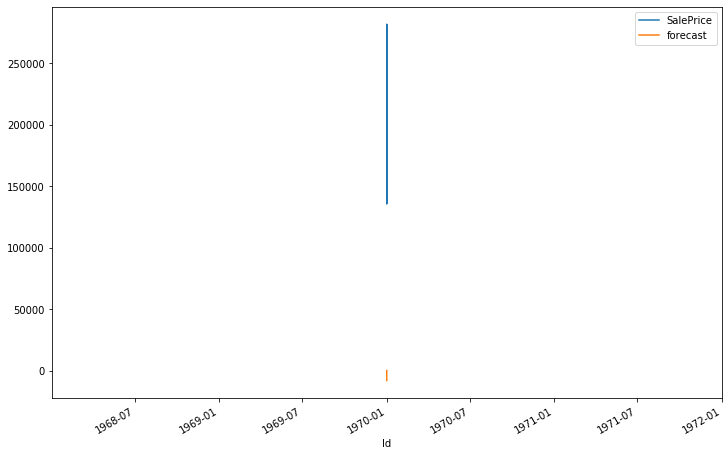

In [25]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['SalePrice','forecast']].plot(figsize=(12,8))

In [26]:
import statsmodels.api as sm

In [27]:
model=sm.tsa.statespace.SARIMAX(df['SalePrice'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


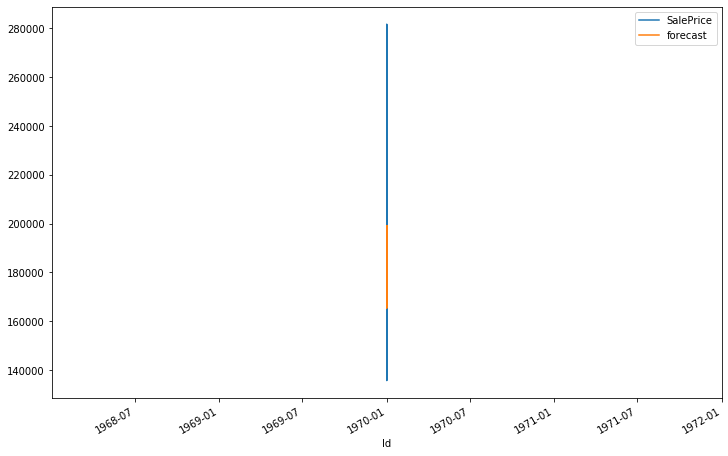

In [29]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['SalePrice','forecast']].plot(figsize=(12,8))